In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
train_ds=pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
test_ds=pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')

In [134]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [135]:
numeric=train_ds.select_dtypes(include=['int64','float64']).columns
categorical=train_ds.select_dtypes(include=['object']).columns

In [136]:
print("column - uniqe val count - null count")
for n in numeric:
    if( train_ds[n].isna().sum()>0):
        print(n,":-",train_ds[n].nunique(),",",train_ds[n].isna().sum())

column - uniqe val count - null count
LotFrontage :- 110 , 259
MasVnrArea :- 327 , 8
GarageYrBlt :- 97 , 81


In [137]:
train_ds['LotFrontage']=train_ds['LotFrontage'].fillna(train_ds['LotFrontage'].mean())
train_ds['MasVnrArea']=train_ds['MasVnrArea'].fillna(train_ds['MasVnrArea'].mode()[0])
train_ds['GarageYrBlt']=train_ds['GarageYrBlt'].fillna(train_ds['GarageYrBlt'].mode()[0])

In [138]:
train_ds[['GarageYrBlt','MasVnrArea','LotFrontage']].head()

,GarageYrBlt,MasVnrArea,LotFrontage
0,2003.0,196.0,65.0
1,1976.0,0.0,80.0
2,2001.0,162.0,68.0
3,1998.0,0.0,60.0
4,2000.0,350.0,84.0


In [139]:
print("column - uniqe val count - null count")
for n in categorical:
    if( train_ds[n].isna().sum()>0):
        print(n,":-",train_ds[n].nunique(),",",train_ds[n].isna().sum())

column - uniqe val count - null count
Alley :- 2 , 1369
MasVnrType :- 3 , 872
BsmtQual :- 4 , 37
BsmtCond :- 4 , 37
BsmtExposure :- 4 , 38
BsmtFinType1 :- 6 , 37
BsmtFinType2 :- 6 , 38
Electrical :- 5 , 1
FireplaceQu :- 5 , 690
GarageType :- 6 , 81
GarageFinish :- 3 , 81
GarageQual :- 5 , 81
GarageCond :- 5 , 81
PoolQC :- 3 , 1453
Fence :- 4 , 1179
MiscFeature :- 4 , 1406


In [140]:
train_ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [141]:
#train_ds['Alley']=train_ds['Alley'].fillna(0)
train_ds.fillna(0)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,...,0,0,MnPrv,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,142125


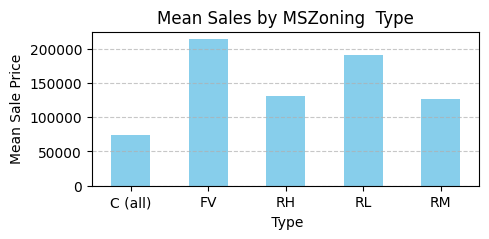

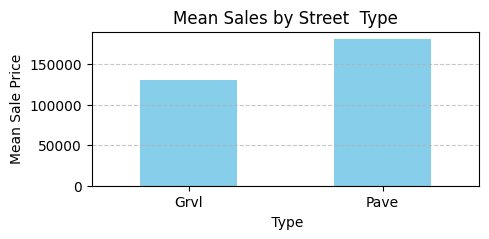

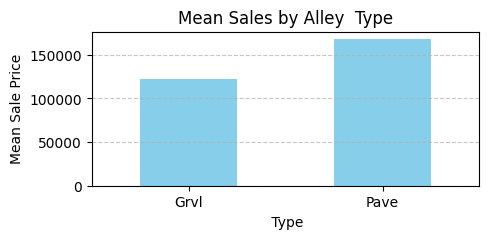

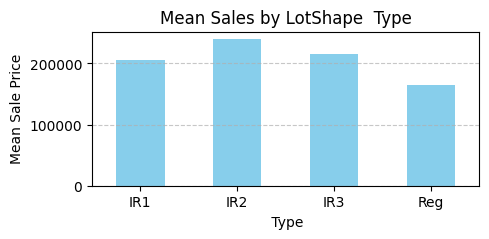

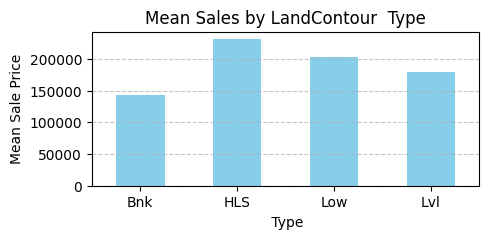

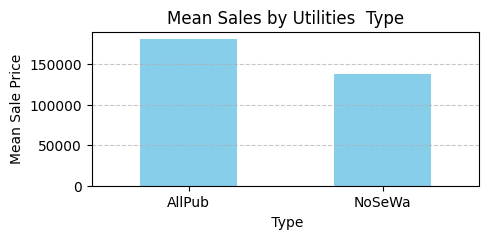

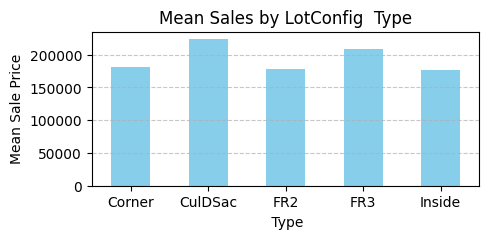

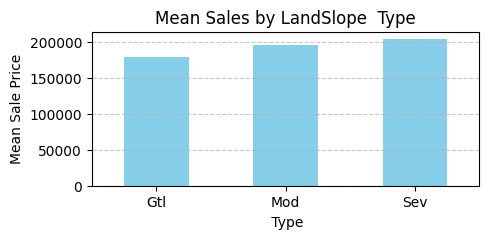

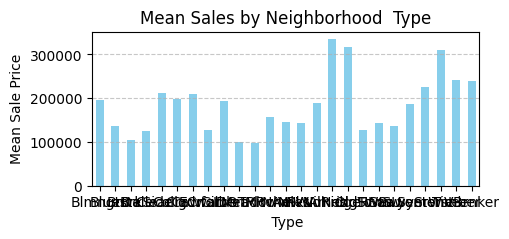

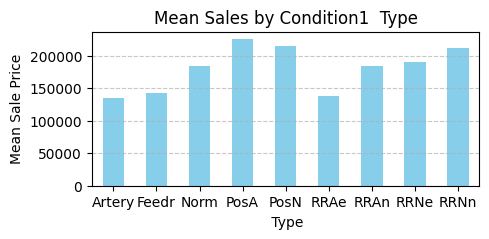

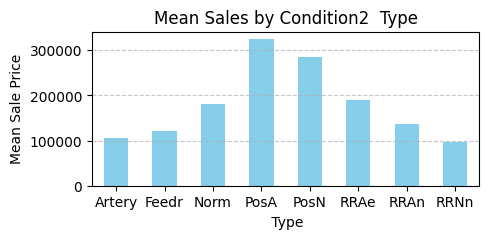

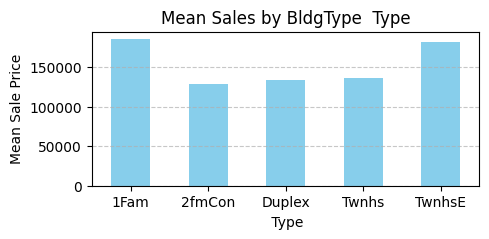

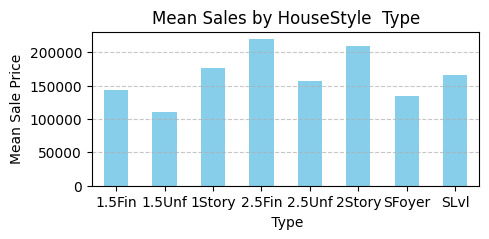

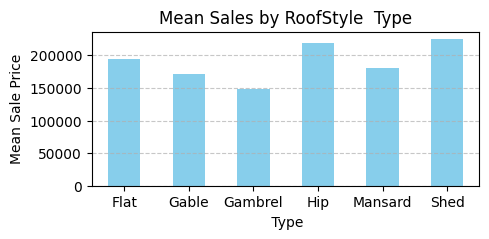

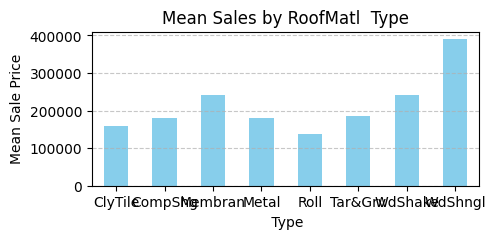

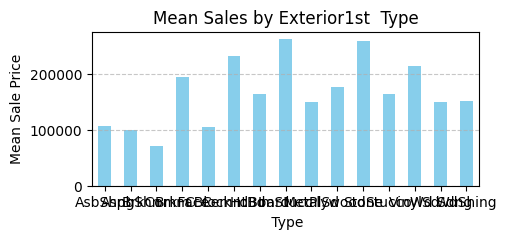

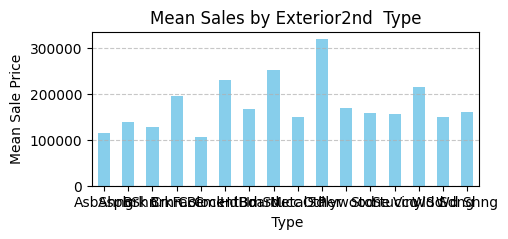

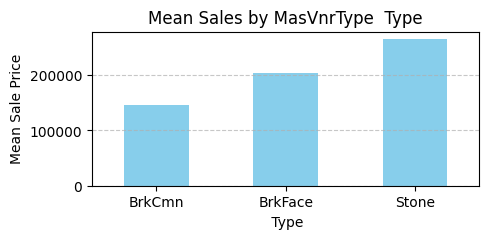

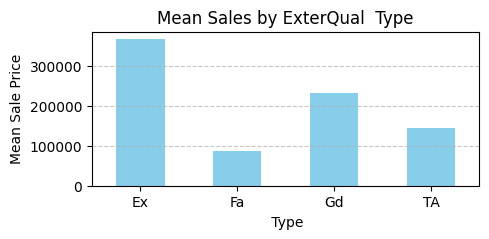

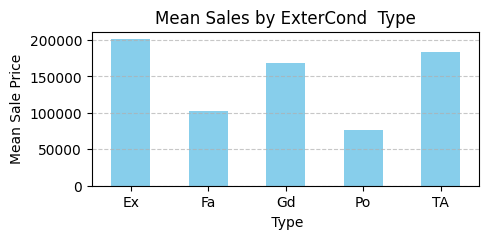

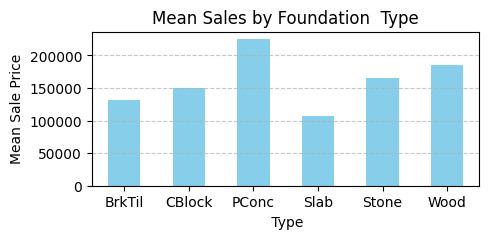

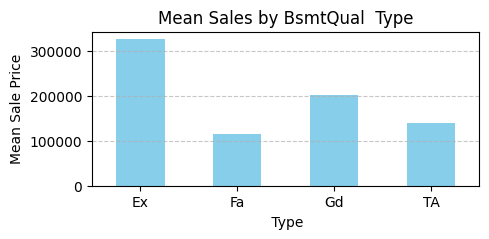

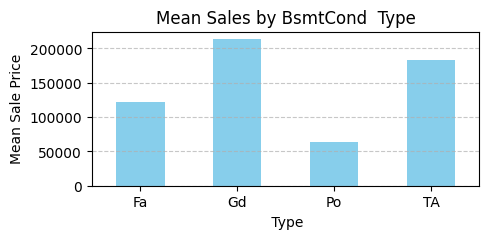

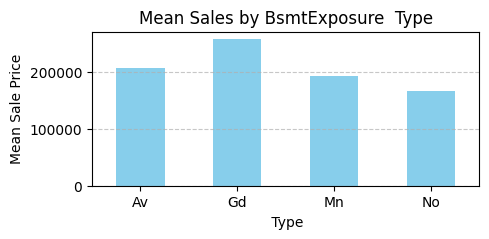

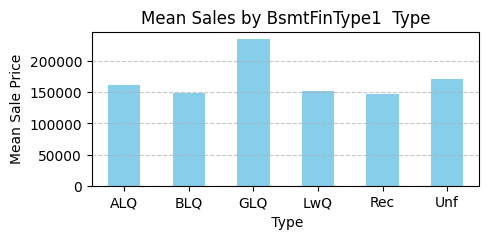

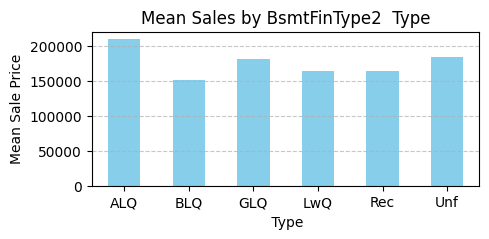

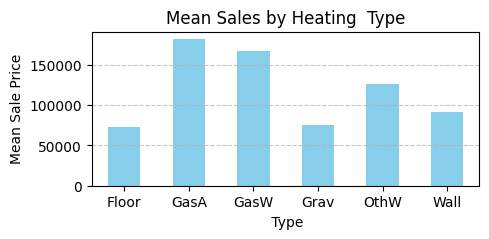

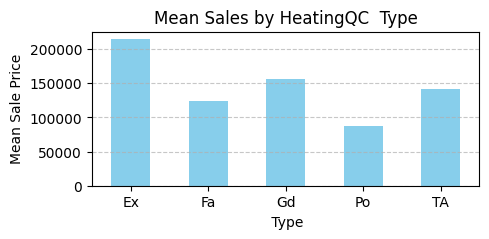

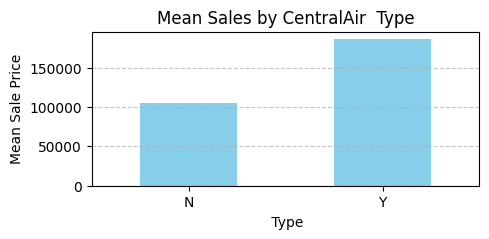

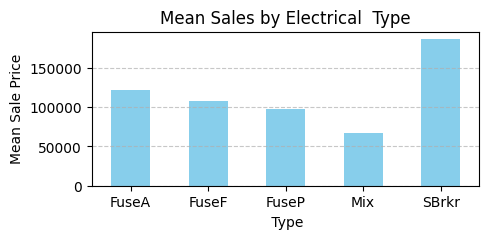

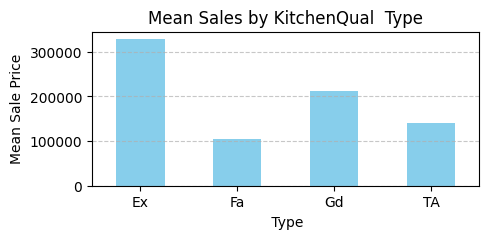

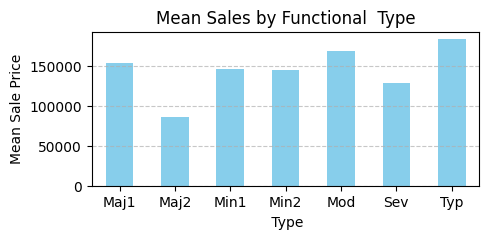

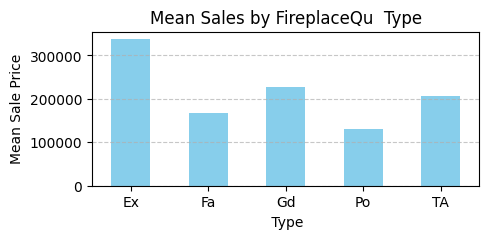

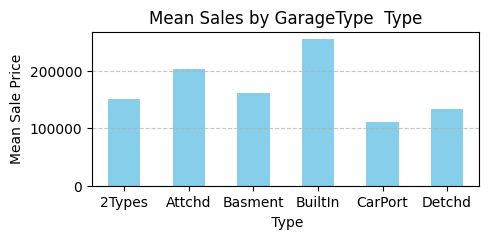

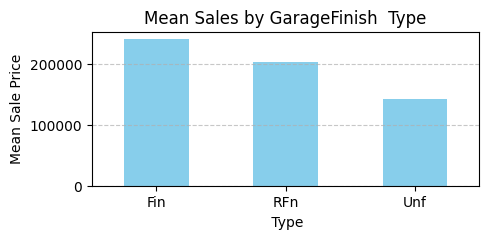

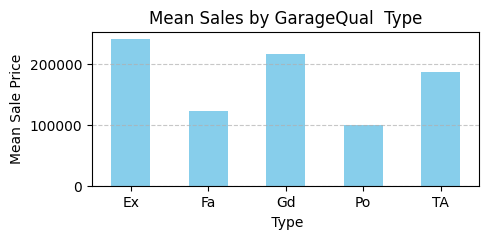

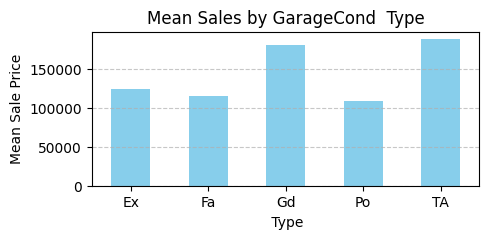

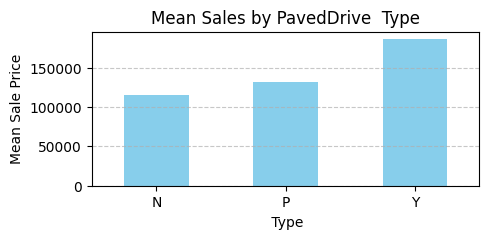

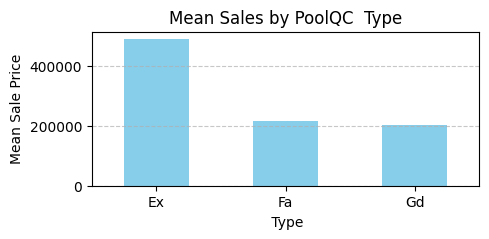

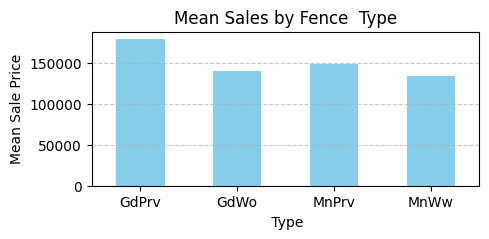

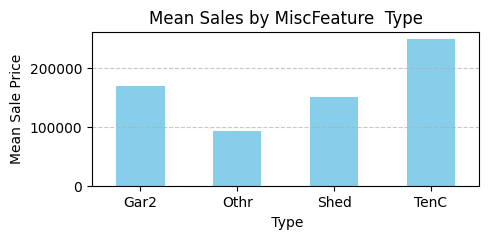

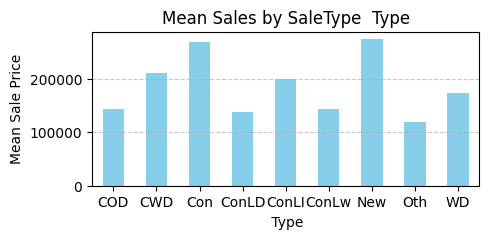

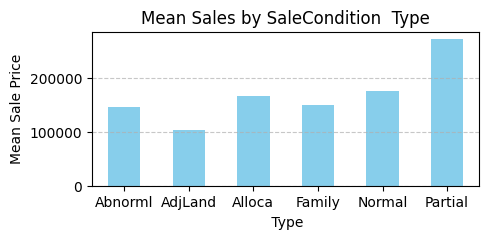

In [142]:
for n in categorical:
    mean_sales = train_ds.groupby(n)['SalePrice'].mean()
    # Plot the mean sales for each category
    mean_sales.plot(kind='bar', color='skyblue', figsize=(5, 2))
    plt.title('Mean Sales by '+n+'  Type')
    plt.xlabel(' Type')
    plt.ylabel('Mean Sale Price')
    plt.xticks(rotation=0)  # Rotate x-axis labels if needed
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()